# Toy model for UHECR track generation

In [9]:
%matplotlib inline

import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

## Fixed definitions

In [10]:
# frame size
N_ROW = 48
N_COL = 48

# mean background level
mu_bg = 1 # photon/pixel/GTU

# number of frames to be generated
N_FRAME = 10

## Configurable parameters

In [11]:
# configurable parameter definition

## Set up

## Background generation
Generate reasonable background frames from a poisson distribution centred on 1 (see: Adams, J.H., Jr et al., 2013. An evaluation of the exposure in nadir observation of the JEM-EUSO mission. Astroparticle Physics, 44, pp.76–90.)

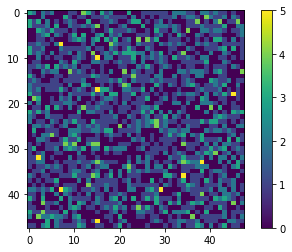

In [27]:
# sample from poisson to fill background frames
samples = np.random.poisson(mu_bg, N_ROW*N_COL*N_FRAME)
bg_frames = np.reshape(samples, (N_FRAME, N_ROW, N_COL))

# plot first frame to check
plt.imshow(bg_frames[0])
plt.colorbar()

## Track generation
Generate UHECR-like tracks based on a simple toy model 

Parameters describing the track:
* start_position: pixel coordinates of starting position of the track
* length: in pixels
* width: in pixels
* theta: rotation angle (0 - 360 deg)
* phi: incidence angle (0, 45, 90 deg)
* brightness: in counts

In [283]:
# sample parameters from their distibutions
start_position = np.around(np.random.uniform(5, 43, 2)).astype(int)
length = round(np.random.normal(20, 4, 1))
width = int(round(np.random.normal(3, 1, 1)))
theta = np.random.uniform(0, np.pi, 1)
phi = np.random.uniform(0, np.pi/4, 1)
brightness = round(np.random.normal(10, 3, 1))

# calculate end position
end_position = np.zeros(2)
end_position[0] = start_position[0] + length * np.cos(theta)
if end_position[0] > 45:
    end_position[0] = 45
if end_position[0] < 0:
    end_position[0] = 0
end_position[1] = start_position[1] + length * np.sin(theta)
if end_position[1] > 45:
    end_position[1] = 45 
if end_position[1] < 0:
    end_position[1] = 0
end_position = np.around(end_position).astype(int)

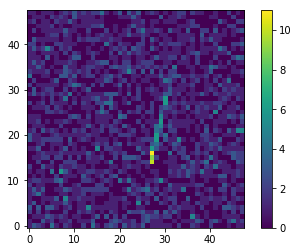

In [284]:
#draw the line on the frame
from skimage.draw import line_aa
track_frame = np.zeros((48, 48), dtype=np.uint8)


for w in range(width): 
    rr, cc, val = line_aa(start_position[0] + w, start_position[1], end_position[0] + w, end_position[1])
    bright_tmp = brightness 
    # give decreasing brightness
    for i in range(len(val)):
        track_frame[rr[i], cc[i]] = val[i] * bright_tmp
        if i%6 == 0:
            bright_tmp = bright_tmp - 1
        if bright_tmp < 0:
            bright_tmp = 0

# add background
samples = np.random.poisson(1, N_ROW*N_COL)
bg_frame = np.reshape(samples, (N_ROW, N_COL))
track_frame = track_frame + bg_frame


#plot to check
plt.imshow(track_frame, origin = "lower")
plt.colorbar()

In [228]:
# Add thickness and incidence angle
# Tidy into class
# Write out to file for student 